In [11]:
pip install yfinance ta matplotlib


Note: you may need to restart the kernel to use updated packages.


C:\Users\Hp\AppData\Local\Temp\ipykernel_14612\2836195231.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


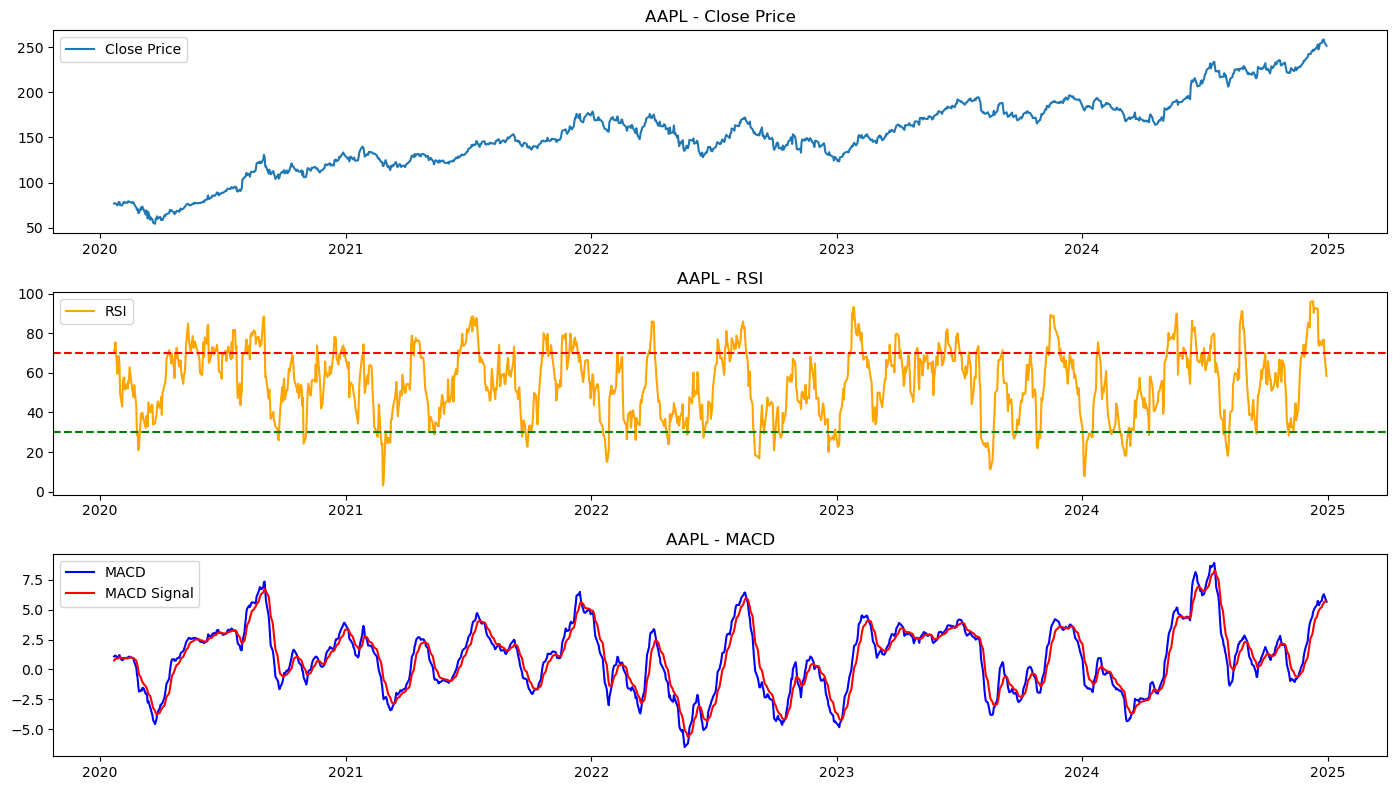

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download stock data
ticker = "AAPL"
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# ---------------------------------
# RSI Calculation (14-period)
# ---------------------------------
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df['RSI'] = rsi

# ---------------------------------
# MACD Calculation (12,26,9)
# ---------------------------------
ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema_12 - ema_26
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Drop NaNs caused by rolling/EMA
df.dropna(inplace=True)

# ---------------------------------
# Plotting
# ---------------------------------
plt.figure(figsize=(14, 8))

# Price
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} - Close Price')
plt.legend()

# RSI
plt.subplot(3, 1, 2)
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title(f'{ticker} - RSI')
plt.legend()

# MACD
plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='MACD Signal', color='red')
plt.title(f'{ticker} - MACD')
plt.legend()

plt.tight_layout()
plt.show()
